In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import metrics
#pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize'] = (15,5)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#Viewing Summary()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [2]:
raw_data =pd.read_csv('Data/nba.csv')

In [3]:
raw_data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [4]:
raw_data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


### Checking for Missing Values

In [5]:
raw_data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [6]:
data_no_mv = raw_data.dropna(axis=0)

In [7]:
data_no_mv.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

### Exploratory Data Analysis

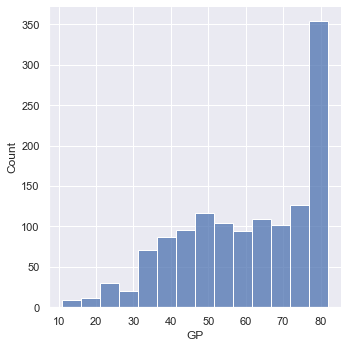

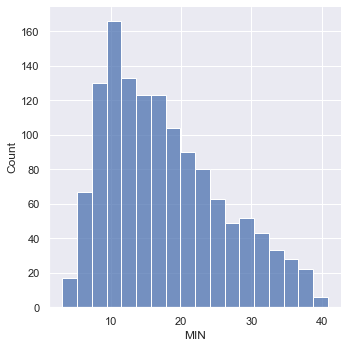

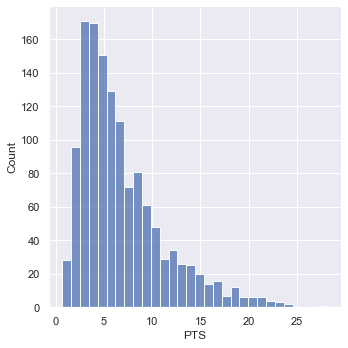

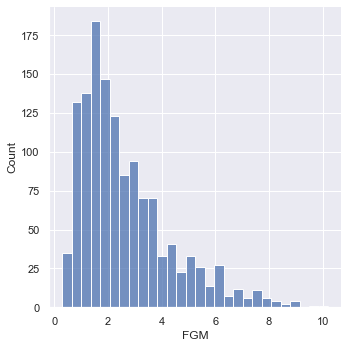

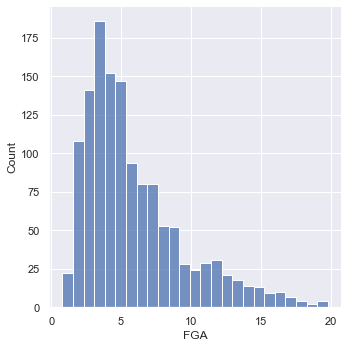

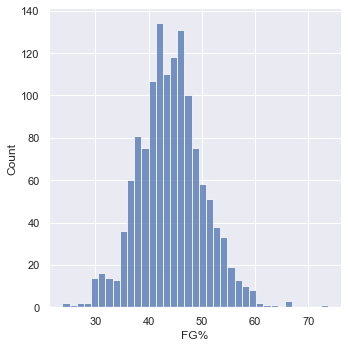

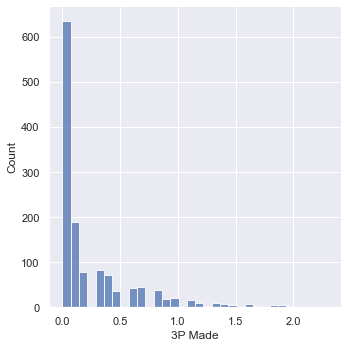

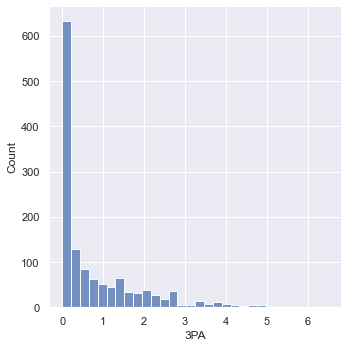

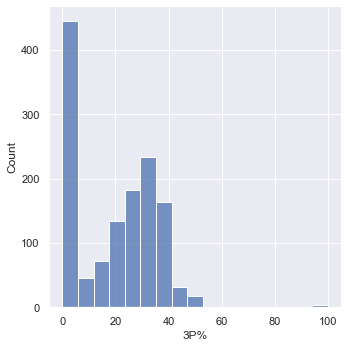

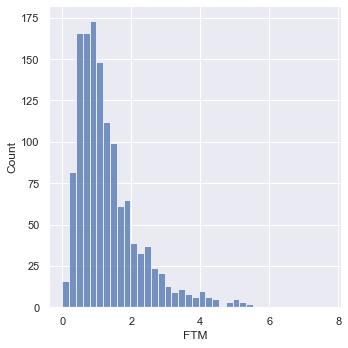

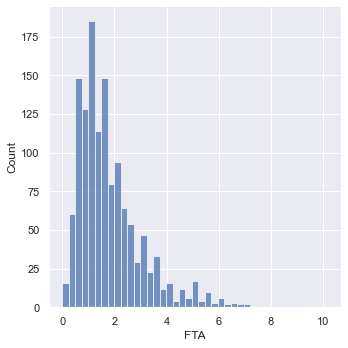

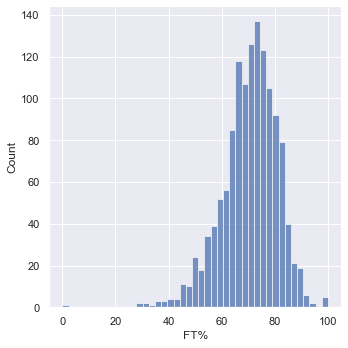

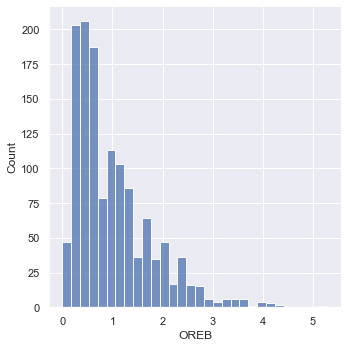

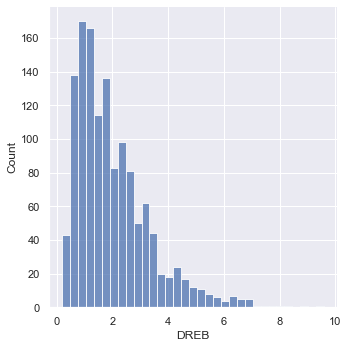

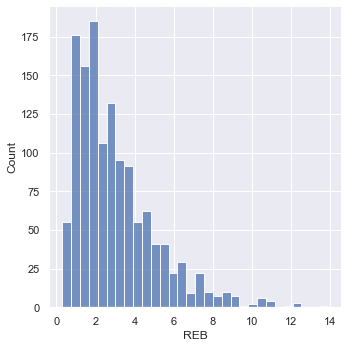

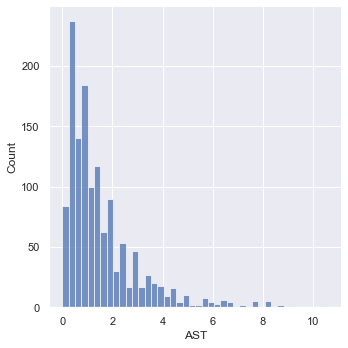

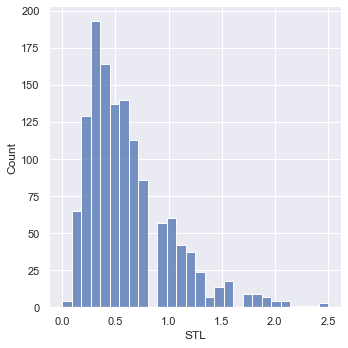

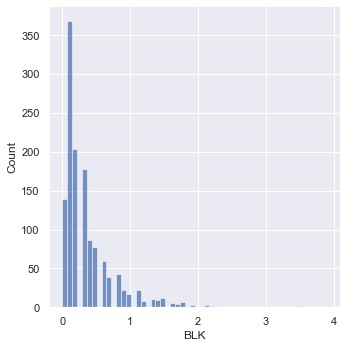

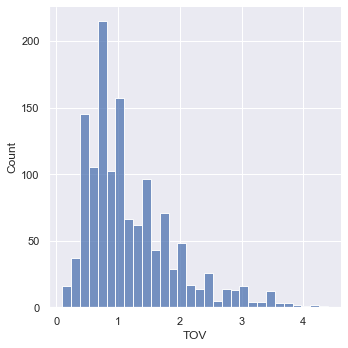

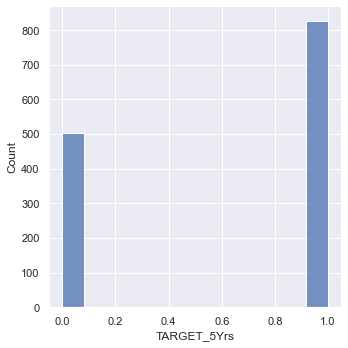

In [18]:
for feat in data_no_mv:
    if feat != 'Name':
        sns.displot(data_no_mv[feat])

In [10]:
raw_data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

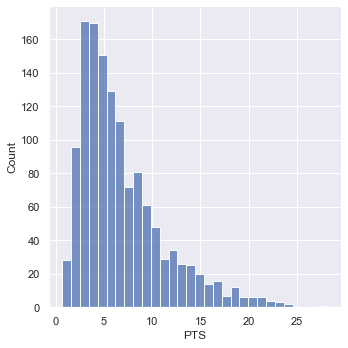

In [11]:
sns.displot(data_no_mv['PTS'])

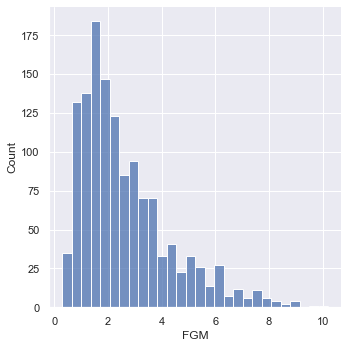

In [12]:
sns.displot(data_no_mv['FGM'])

In [13]:
raw_data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

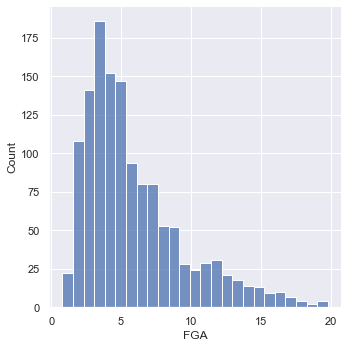

In [14]:
sns.displot(data_no_mv['FGA'])

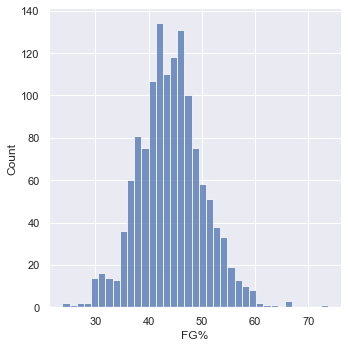

In [15]:
sns.displot(data_no_mv['FG%'])

In [ ]:
sns.displot(data_no_mv['3P Made'])

In [19]:
data_no_mv.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [20]:
data = data_no_mv.copy()
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
data.columns

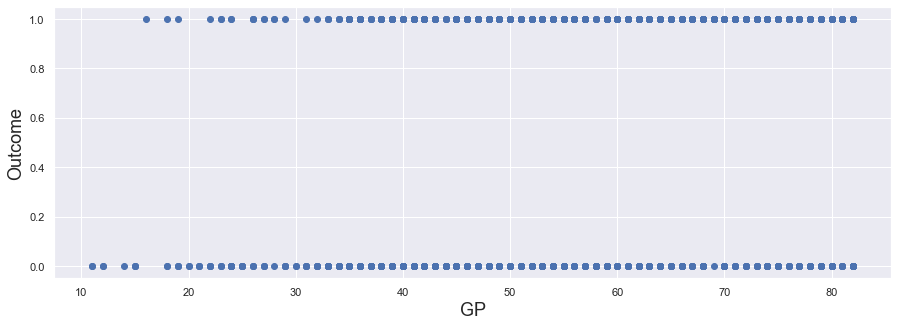

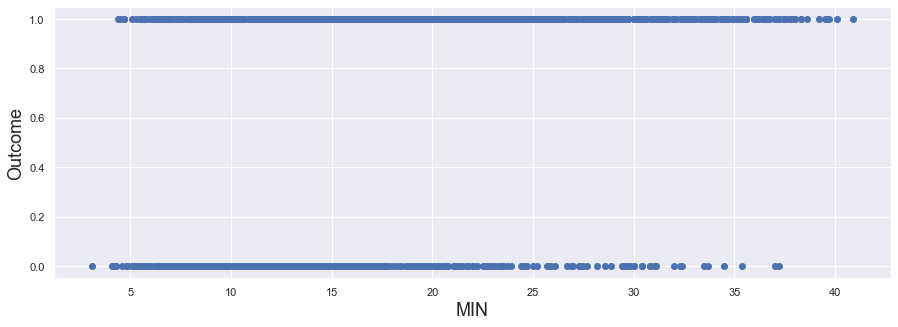

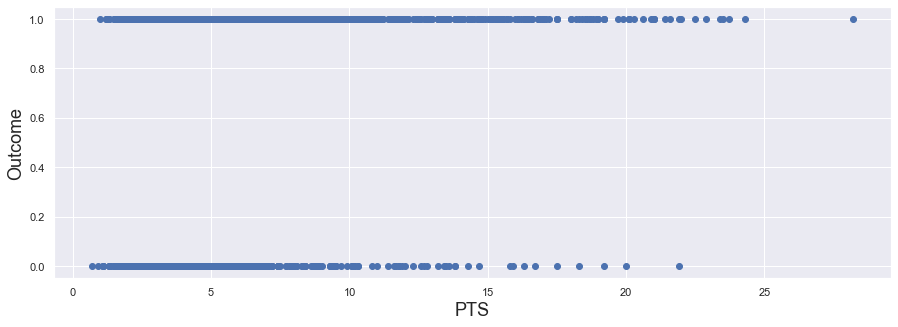

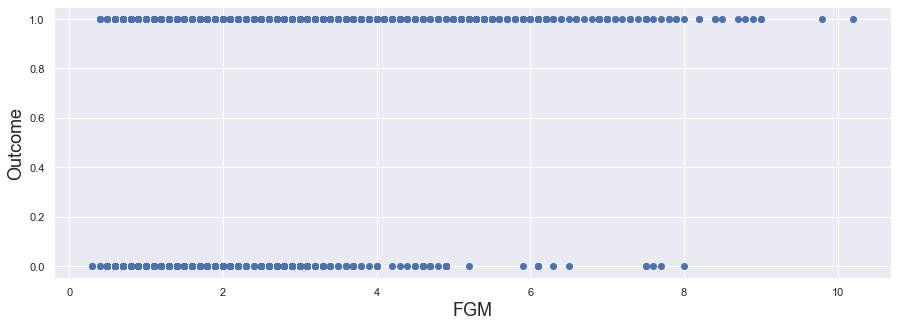

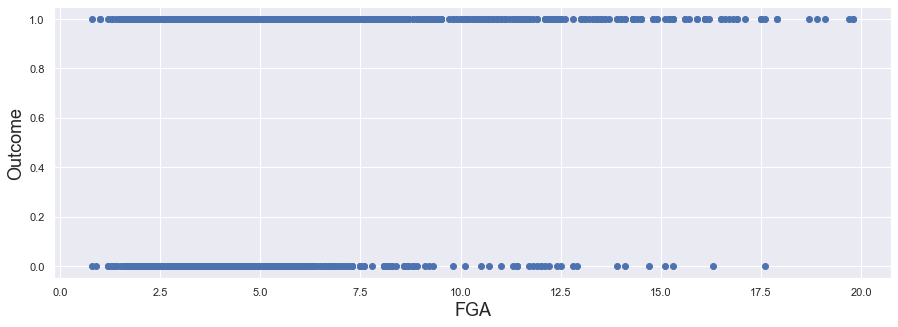

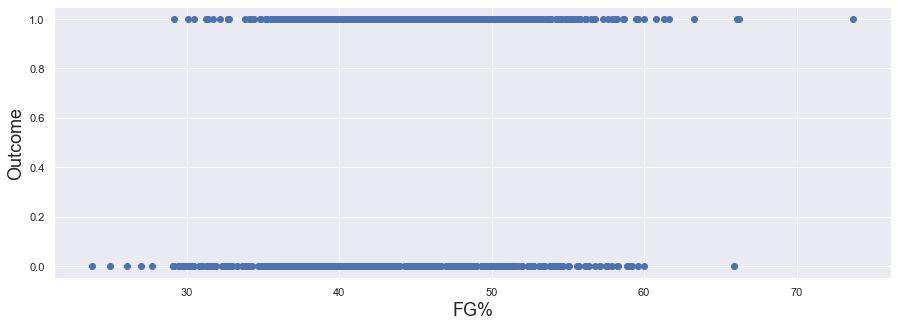

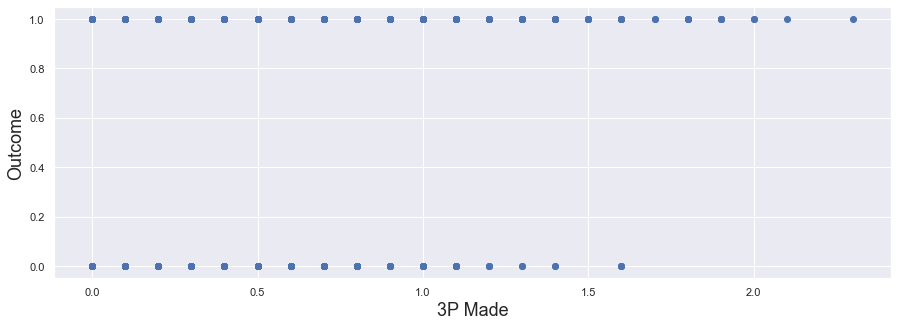

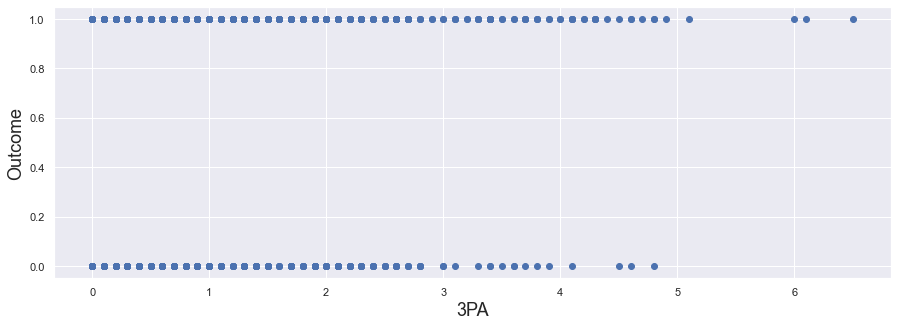

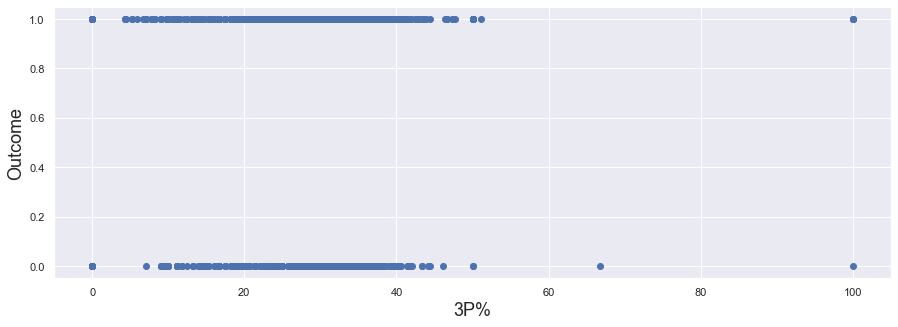

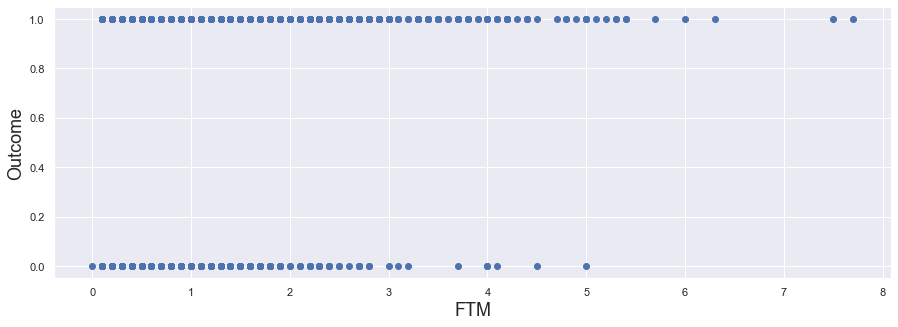

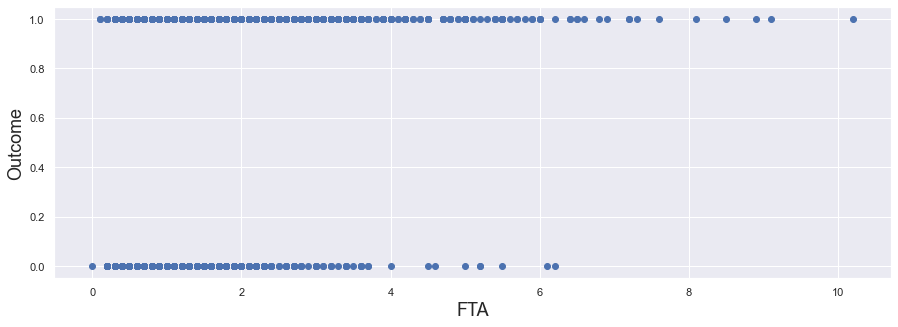

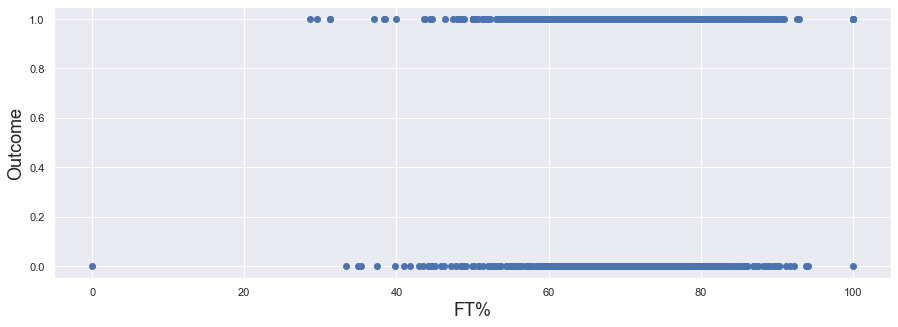

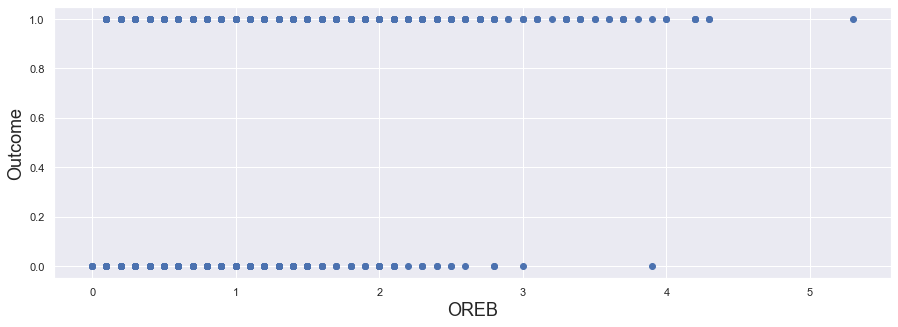

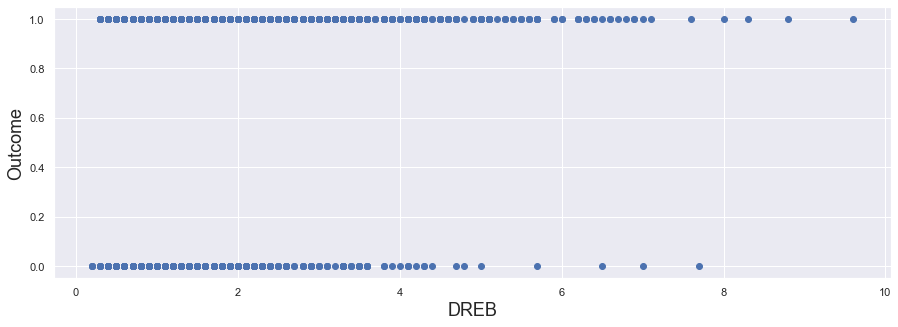

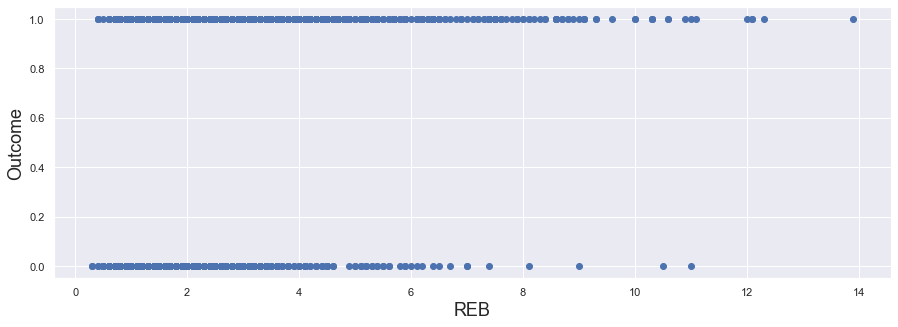

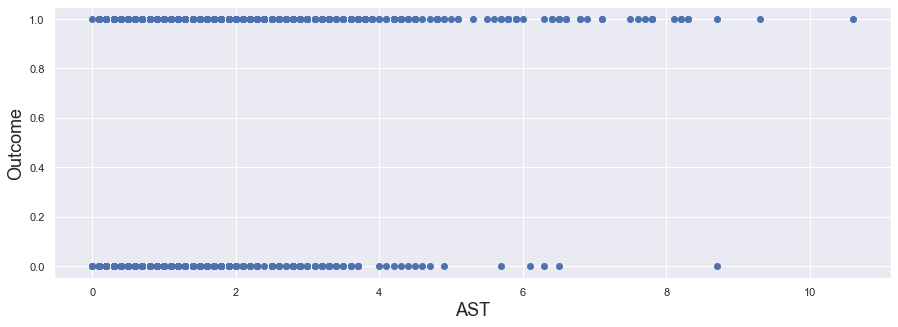

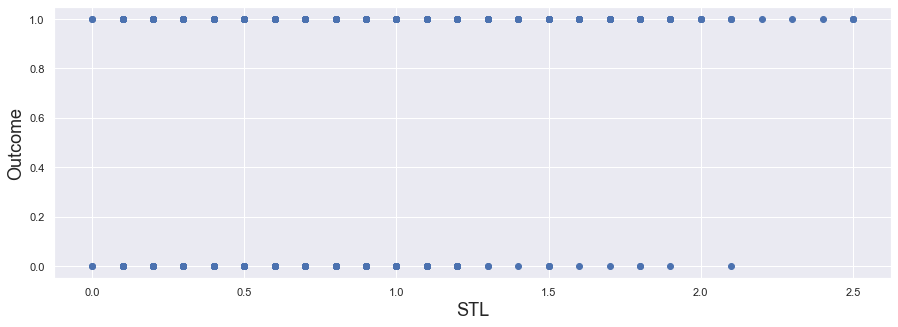

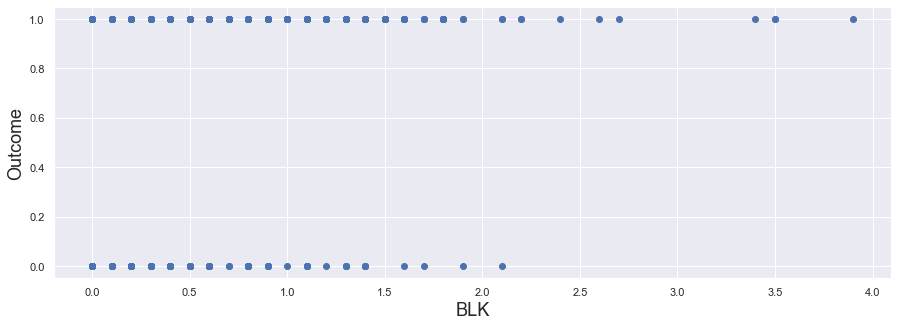

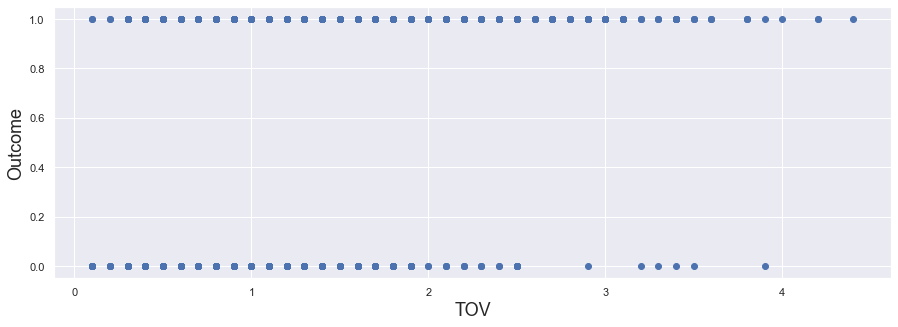

In [21]:
#Scatterplots
for feat in data.columns:
    if feat not in ['Name', 'TARGET_5Yrs']:
        plt.scatter(data[feat],data['TARGET_5Yrs'])
        plt.xlabel(feat, size=18)
        plt.ylabel('Outcome', size=18)
        plt.show()

In [ ]:
data.columns

In [ ]:
plt.scatter(data['MIN'],data['TARGET_5Yrs'])
plt.xlabel('MIN', size=18)
plt.ylabel('Targets', size=18)
plt.show()

In [ ]:
plt.scatter(data['PTS'],data['TARGET_5Yrs'])
plt.xlabel('PTS', size=18)
plt.ylabel('Targets', size=18)
plt.show()

In [ ]:
data.columns

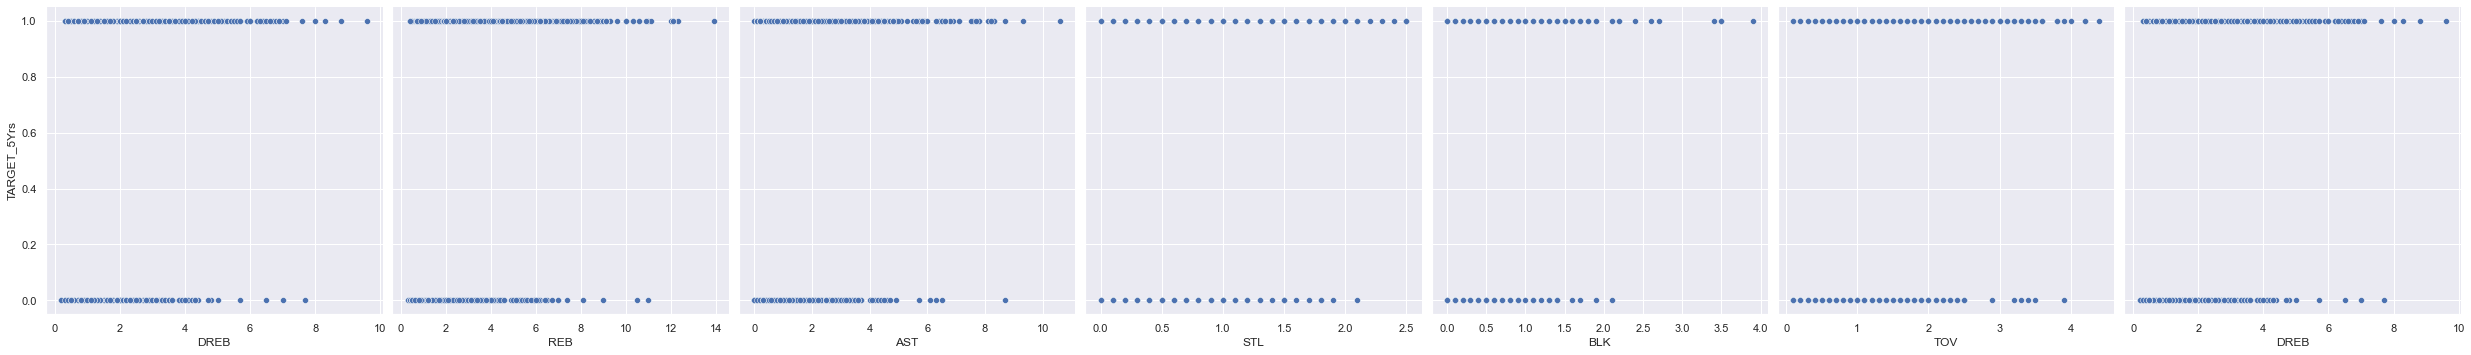

In [35]:
sns.pairplot(data,x_vars=['DREB','REB','AST','STL','BLK', 'TOV','DREB'], y_vars=['TARGET_5Yrs'], height=5)

### OLS Assumptions

In [36]:
# the independent variables set 
X = data[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TOV']]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

    feature           VIF
0        GP     22.092249
1       MIN     85.578379
2       PTS  12255.527526
3       FGM   7351.067158
4       FGA    299.225702
5       FG%     71.910207
6   3P Made     83.697771
7       3PA     64.307034
8       3P%      4.184642
9       FTM    629.884972
10      FTA    168.347029
11      FT%     71.800697
12     OREB    668.797452
13     DREB   2434.374625
14      REB   5446.057343
15      AST     10.808624
16      STL     11.590219
17      BLK      3.837138
18      TOV     29.562415


### Creating Logistic Regressions

In [37]:
#selecting columns for model training
x1 = data[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TOV']]
y = data['TARGET_5Yrs']

#### Using Statsmodel

In [38]:
x = sm.add_constant(x1)
results = sm.Logit(y,x).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.549863
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1329
Model:                          Logit   Df Residuals:                     1309
Method:                           MLE   Df Model:                           19
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                  0.1710
Time:                        22:28:26   Log-Likelihood:                -730.77
converged:                       True   LL-Null:                       -881.55
Covariance Type:            nonrobust   LLR p-value:                 9.603e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6169      1.221     -3.780      0.000      -7.011      -2.223
GP             0.0360      0.005      7.630      0.000       0.027       0.045
MIN           -0.0619      0.033     -1.863      0.062      -0.127       0.003
PTS           -0.2643      0.884     -0.299      0.765      -1.998       1.469
FGM           -0.0257      1.747     -0.015      0.988      -3.450       3.399
FGA            0.3461      0.231      1.497      0.134      -0.107       0.799
FG%            0.0405      0.022      1.874      0.061      -0.002       0.083
3P Made        3.5323      1.330      2.656      0.008       0.925       6.139
3PA           -1.1705      0.410     -2.856      0.004      -1.974      -0.367
3P%            0.0039      0.005      0.744      0.457      -0.006       0.014
FTM            0.7708      1.022      0.754      0.451      -1.232       2.773
FTA           -0.2313      0.469     -0.493      0.622      -1.151       0.688
FT%            0.0088      0.010      0.887      0.375      -0.011       0.028
OREB           0.3325      1.286      0.258      0.796      -2.189       2.854
DREB          -0.6620      1.283     -0.516      0.606      -3.177       1.853
REB            0.5464      1.276      0.428      0.669      -1.955       3.048
AST            0.3097      0.112      2.764      0.006       0.090       0.529
STL            0.0016      0.318      0.005      0.996      -0.622       0.625
BLK            0.5717      0.271      2.110      0.035       0.041       1.103
TOV           -0.3041      0.272     -1.118      0.263      -0.837       0.229
==============================================================================
"""

#### Calculating the Accuracy

In [39]:
pred = results.pred_table()

In [40]:
pred

array([[272., 231.],
       [136., 690.]])

#### Using Sckit

In [42]:
x1 = data[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TOV']]
y = data['TARGET_5Yrs']

In [43]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x1,y)

In [44]:
model.classes_

array([0., 1.])

In [45]:
model.intercept_

array([-1.91694098])

In [46]:
model.score(x1,y)

0.7193378480060195

In [47]:
sum_tab = pd.DataFrame(x1.columns.values, columns=['Features']) 

In [48]:
sum1= model.coef_[0]
sum1.shape

(19,)

In [49]:
sum_tab['Weights'] = sum1
sum_tab

,Features,Weights
0,GP,0.035460
1,MIN,-0.051913
2,PTS,0.439594
3,FGM,-0.392188
4,FGA,-0.128159
5,FG%,-0.002602
6,3P Made,1.267900
7,3PA,-0.558348
8,3P%,0.003206
9,FTM,0.465090


In [50]:
f_regression(x1,y)

(array([2.49442398e+02, 1.47240318e+02, 1.45797084e+02, 1.47615991e+02,
        1.22476464e+02, 7.79781725e+01, 1.62987265e+00, 3.46237285e-01,
        1.54370158e-02, 1.27003643e+02, 1.27448730e+02, 1.22451392e+01,
        1.26149368e+02, 1.17918164e+02, 1.31714734e+02, 4.13267686e+01,
        7.33937800e+01, 6.22936508e+01, 1.04985825e+02]),
 array([1.27200501e-51, 3.29304353e-32, 6.33472261e-32, 2.77771101e-32,
        2.72131047e-27, 3.22827324e-18, 2.01944027e-01, 5.56351012e-01,
        9.01139487e-01, 3.38142099e-28, 2.75564762e-28, 4.81908648e-04,
        5.00915808e-28, 2.23775110e-26, 3.88933766e-29, 1.79220138e-10,
        2.90312417e-17, 6.15035061e-15, 9.18982699e-24]))

In [51]:
f_stats = f_regression(x1,y)[0].round(5)
p_values = f_regression(x1,y)[1].round(4)

In [52]:
f_stats

array([2.4944240e+02, 1.4724032e+02, 1.4579708e+02, 1.4761599e+02,
       1.2247646e+02, 7.7978170e+01, 1.6298700e+00, 3.4624000e-01,
       1.5440000e-02, 1.2700364e+02, 1.2744873e+02, 1.2245140e+01,
       1.2614937e+02, 1.1791816e+02, 1.3171473e+02, 4.1326770e+01,
       7.3393780e+01, 6.2293650e+01, 1.0498583e+02])

In [53]:
p_values

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       2.019e-01, 5.564e-01, 9.011e-01, 0.000e+00, 0.000e+00, 5.000e-04,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00])

In [55]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [56]:
cm = confusion_matrix(y, model.predict(x1))


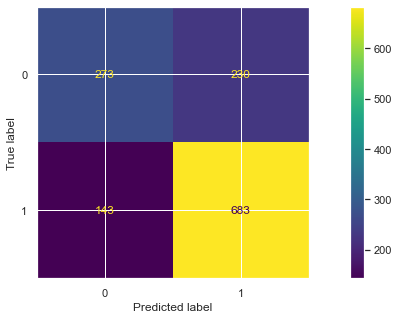

In [57]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [58]:
cm = pd.DataFrame(confusion_matrix(y, model.predict(x1)))
cm.columns = ['Predicted 0', 'Predicted 1']
cm = cm.rename(index={0:'Actual 0', 1:'Actual 1'})
cm

,Predicted 0,Predicted 1
Actual 0,273,230
Actual 1,143,683


In [59]:
#Accuracy
cm1 = np.array(cm)
accuracy_train = (cm1[0,0]+cm1[1,1])/cm1.sum()
accuracy_train

0.7193378480060195

In [60]:
## Classification Report
print(classification_report(y, model.predict(x1)))

              precision    recall  f1-score   support

         0.0       0.66      0.54      0.59       503
         1.0       0.75      0.83      0.79       826

    accuracy                           0.72      1329
   macro avg       0.70      0.68      0.69      1329
weighted avg       0.71      0.72      0.71      1329

